In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### NYC Restaurants

<font face="Tahoma" size = 3> Setup

In [69]:
df = pd.read_csv("NYC_Restaurants.csv", dtype=str)
df.head(2)

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection


<font face="Tahoma" size = 3> Q1. Create a unique name for each restaurant.

In [70]:
df.isnull().sum(axis = 0)

Unnamed: 0                   0
CAMIS                        0
DBA                          0
BORO                         0
BUILDING                     0
STREET                       0
ZIPCODE                      0
PHONE                        0
CUISINE DESCRIPTION          0
INSPECTION DATE              0
ACTION                       0
VIOLATION CODE             577
VIOLATION DESCRIPTION      601
CRITICAL FLAG                0
SCORE                     2990
GRADE                    23624
GRADE DATE               24490
RECORD DATE                  0
INSPECTION TYPE              0
dtype: int64

In [71]:
cols = ['DBA','BUILDING','STREET','ZIPCODE','BORO']
df['Restaurant'] = df[cols].agg(' '.join,axis=1)

In [72]:
df['Restaurant'][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: Restaurant, dtype: object

<font face="Tahoma" size = 3>Q2. How many restaurants are included in the data?

In [73]:
df['Restaurant'].nunique()

10114

In [100]:
#df['DBA'].nunique()

<font face="Tahoma" size = 3>Q3. How many chains are there? 

In [74]:
df[df['Restaurant'].map(df['Restaurant'].value_counts() > 1)]['DBA'].nunique()


7824

<font face="Tahoma" size = 3>Q4. Plot a bar graph of the top 20 most popular chains.

<AxesSubplot:>

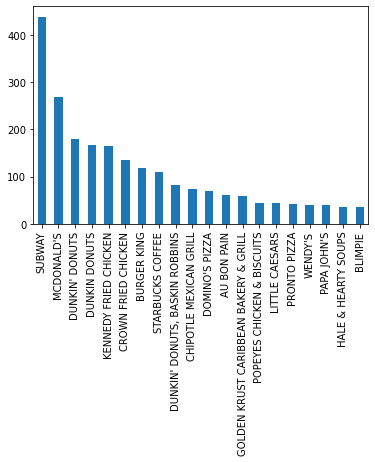

In [75]:
df[df['Restaurant'].map(df['Restaurant'].value_counts() > 1)]['DBA'].value_counts()[0:20].plot(kind='bar')

<font face="Tahoma" size = 3>Q5. What fraction of all restaurants are chain restaurants?

In [76]:
round(df[df['Restaurant'].map(df['Restaurant'].value_counts() > 1)]['DBA'].nunique() / df['Restaurant'].nunique(),2)

0.77

<font face="Tahoma" size = 3>Q6. Plot the number of non-chain restaurants in each boro

In [92]:
chains = df[df['Restaurant'].map(df['Restaurant'].value_counts() > 1)][['DBA','Restaurant']]

In [93]:
chains['DBA'].nunique()

7824

In [94]:
chains['Restaurant'].nunique()

8849

In [101]:
nonchains = df[~(df['DBA'].isin(chains['DBA']))]

In [106]:
nonchains['DBA'].value_counts()
#nonchains['DBA'].nunique()

PHOEBE'S                               2
CREDIT SUISSE                          2
LOESER'S HEBREW NATIONAL               1
EAST SIDE BILLARD                      1
CHECKER'S                              1
                                      ..
NEW LINE INTERNET CAFE                 1
DISNEY ABC CAFETERIA                   1
ENDLESS SUMMER                         1
PRABHU KIRPA SWEETS AND RESTAURANT     1
NORTH SHORE TOWERS AND COUNTRY CLUB    1
Name: DBA, Length: 992, dtype: int64

In [107]:
nonchains['Restaurant'].value_counts()
#nonchains['Restaurant'].nunique()

BUBBLE CREPE 70-23 AUSTIN STREET 11375 QUEENS                                                 1
WILLIAM GREENBERG DESSERT 1 WEST   58 STREET 10019 MANHATTAN                                  1
MI RANCHITO MEXICAN RESTAURANT 1468 ST NICHOLAS AVENUE 10033 MANHATTAN                        1
GOLDEN CRUST PIZZA AND GRILL 9023 37 AVENUE 11372 QUEENS                                      1
Jimmy Deli Grill 2254       EAST TREMONT AVENUE                                10462 BRONX    1
                                                                                             ..
GOLDEN STAR 2110 CLOVE RD 10305 STATEN ISLAND                                                 1
EAST VILLAGE TAVERN 158 AVENUE C 10009 MANHATTAN                                              1
CHAN'S VILLAGE 1328 METROPOLITAN AVENUE 10462 BRONX                                           1
CHOP SHOP 254        10 AVENUE                                          10001 MANHATTAN       1
IL CAFFE LATTE 2 458 WEST 145TH STREET 1

In [111]:
df[df['BORO'] == "Missing"][0:2]

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Restaurant
11196,11196,41197540,DJERDAN,Missing,9,E WESLEY ST,07606,7184843180,Mediterranean,12/30/2014,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,6,A,12/30/2014,02/12/2015,Cycle Inspection / Initial Inspection,DJERDAN 9 E WESLEY ST 07606 Missing
11197,11197,41197540,DJERDAN,Missing,9,E WESLEY ST,07606,7184843180,Mediterranean,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,6,A,12/30/2014,02/12/2015,Cycle Inspection / Initial Inspection,DJERDAN 9 E WESLEY ST 07606 Missing


In [118]:
df_subset = df[(df['DBA'].isin(nonchains['DBA'].value_counts().index))]
df_subset = df_subset[df_subset['BORO'] != "Missing"]

<AxesSubplot:>

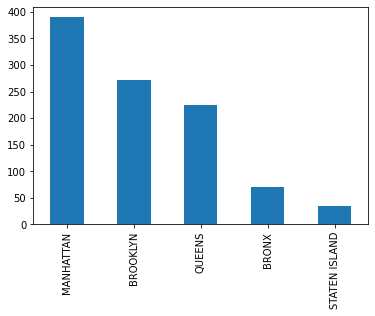

In [121]:
df_subset['BORO'].value_counts().plot(kind='bar')

<font face="Tahoma" size = 3>Q7. Plot the number of non-chain restaurants in each boro